125440 44100


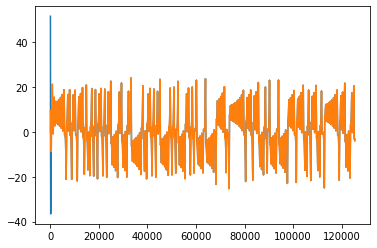

In [77]:
# Synchronized Chaos using Lorenz Attractor
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

x_dat = []
y_dat = []
z_dat = []
y1_dat = []
z1_dat = []

delta = float(10) # Prandtl number
r = float(28)
b = float(8) / 3
h = 1e-3 # time step
def Lorenz(x, y, z):
    dx_dt = delta * (y - x)
    dy_dt = r * x - y - x * z
    dz_dt = x * y - b * z
    x += dx_dt * h
    y += dy_dt * h
    z += dz_dt * h
    return (x, y, z)

samplerate, data = wavfile.read('recover_this_please.wav')
print (np.size(data), samplerate)

maxIt = np.size(data)
size = 30

# initial state of the driver system
x = random.random() * size * 2 - 1
y = random.random() * size * 2 - 1
z = random.random() * size * 2 - 1

# initial state of the sub-system
# x1 = random.random() * size * 2 - 1
y1 = random.random() * size * 2 - 1
z1 = random.random() * size * 2 - 1

for i in range(maxIt):
    (x, y, z) = Lorenz(x, y, z)
    # x variable of the driver is chosen as driver signal
    (x1, y1, z1) = Lorenz(x, y1, z1)
    # 2 y and 2 z values should become synched w/ time
    #print '(%04i, %+07.3f, %+07.3f, %+07.3f, %+07.3f)' % (i, y, y1, z, z1)
    x_dat.append(x)
    y_dat.append(y)
    z_dat.append(z)
    y1_dat.append(y1)
    z1_dat.append(z1)
plt.plot(np.arange(0,maxIt),y_dat)
plt.plot(np.arange(0,maxIt),y1_dat)

In [78]:
x_dat1 = []
y_dat1 = []
z_dat1 = []
y1_dat1 = []
z1_dat1 = []
x1_dat1 = []
r_dat1 = []

new = x_dat+(data*5e-4)
#plt.plot(np.arange(0,np.size(data)),r)

def Lorenz1(x, x1, y, z):
    dx_dt = delta * (y - x1)
    dy_dt = r * x - y - x * z
    dz_dt = x * y - b * z
    x += dx_dt * h
    y += dy_dt * h
    z += dz_dt * h
    x1 
    return (x, x1, y, z)

for i in range(maxIt):
    (r, x1, y1, z1) = Lorenz1(new[i], x_dat[i], y1, z1)
    # 2 y and 2 z values should become synched w/ time
    #print '(%04i, %+07.3f, %+07.3f, %+07.3f, %+07.3f)' % (i, y, y1, z, z1)
    x_dat1.append(x)
    y_dat1.append(y)
    z_dat1.append(z)
    y1_dat1.append(y1)
    z1_dat1.append(z1)
    x1_dat1.append(x1)
    r_dat1.append(r)
print(np.size(x1_dat1))

125440


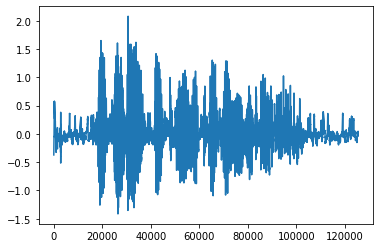

In [79]:
recovered = []
for i in range(maxIt):
    recovered.append(r_dat1[i] - x1_dat1[i])
plt.plot(np.arange(maxIt),recovered)


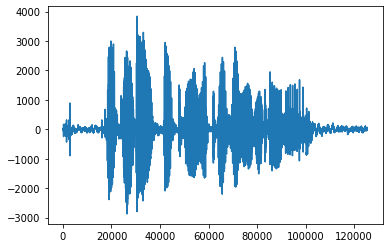

In [80]:
plt.plot(np.arange(maxIt),data)

In [81]:
from scipy.io.wavfile import write
samplerate = 44100
write("recovered.wav", samplerate, np.array(recovered))
write("scrambled.wav", samplerate, np.array(new))